# 3. Tracking and Event Data
In this Notebook we will be working with player tracking data, and create shot maps with both tracking and event data provided by Metrica Sports (https://github.com/metrica-sports/sample-data)

In [1]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import Metrica_IO as mio
import Metrica_VIZ as mviz

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
#get the url's from the Metrica Sports github page, with sample game 1 and 2
game1_events = "https://raw.githubusercontent.com/metrica-sports/sample-data/master/data/Sample_Game_1/Sample_Game_1_RawEventsData.csv"
game1_away_tracking = "https://raw.githubusercontent.com/metrica-sports/sample-data/master/data/Sample_Game_1/Sample_Game_1_RawTrackingData_Away_Team.csv"
game1_home_tracking = "https://raw.githubusercontent.com/metrica-sports/sample-data/master/data/Sample_Game_1/Sample_Game_1_RawTrackingData_Home_Team.csv"

game2_events = "https://raw.githubusercontent.com/metrica-sports/sample-data/master/data/Sample_Game_2/Sample_Game_2_RawEventsData.csv"
game2away_tracking = "https://raw.githubusercontent.com/metrica-sports/sample-data/master/data/Sample_Game_2/Sample_Game_2_RawTrackingData_Away_Team.csv"
game2_home_tracking = "https://raw.githubusercontent.com/metrica-sports/sample-data/master/data/Sample_Game_1/Sample_Game_1_RawTrackingData_Home_Team.csv"

In [3]:
#load data
df_events1 = pd.read_csv(game1_events)
df_track_away1 = pd.read_csv(game1_away_tracking)
df_track_home1 = pd.read_csv(game1_home_tracking)

/home/rcr1/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (0,1,2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Explore our event data

In [4]:
#initial look
df_events1.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,1,0.04,0,0.00,Player19,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,1,0.04,3,0.12,Player19,Player21,0.45,0.39,0.55,0.43
2,Away,PASS,NaN,1,3,0.12,17,0.68,Player21,Player15,0.55,0.43,0.58,0.21
3,Away,PASS,NaN,1,45,1.80,61,2.44,Player15,Player19,0.55,0.19,0.45,0.31
4,Away,PASS,NaN,1,77,3.08,96,3.84,Player19,Player21,0.45,0.32,0.49,0.47


In [5]:
#see which events has occured in the match
df_events1["Type"].value_counts()

PASS              799
RECOVERY          278
BALL LOST         257
CHALLENGE         233
SET PIECE          77
BALL OUT           51
SHOT               24
FAULT RECEIVED     22
CARD                4
Name: Type, dtype: int64

Change the coordinate system of the Metrica start- and end locations from ranging between 0 and 1 to pitch length of 106 m. and pitch width of 53 m. with origin in the middle.

In [6]:
df_events1 = mio.to_metric_coordinates(df_events1)

### Assign events to home- and away team.

In [7]:
home_events = df_events1[df_events1["Team"] == "Home"]
away_events = df_events1[df_events1["Team"] == "Away"]

In [8]:
home_events["Type"].value_counts()

PASS              437
RECOVERY          135
BALL LOST         129
CHALLENGE         118
SET PIECE          45
SHOT               18
BALL OUT           18
FAULT RECEIVED     15
CARD                2
Name: Type, dtype: int64

In [9]:
away_events["Type"].value_counts()

PASS              362
RECOVERY          143
BALL LOST         128
CHALLENGE         115
BALL OUT           33
SET PIECE          32
FAULT RECEIVED      7
SHOT                6
CARD                2
Name: Type, dtype: int64

### Looking into the shots data

In [10]:
#create a dataframe of all shots
shots = df_events1[df_events1["Type"] == "SHOT"]

In [11]:
#divide the shots in home- and away shots
home_shots = home_events[home_events.Type == "SHOT"]
away_shots = away_events[away_events.Type == "SHOT"]

In [12]:
#look into the different subtypes (header, free kicks etc.)
print(home_shots["Subtype"].value_counts())
print(away_shots["Subtype"].value_counts())

OFF TARGET-OUT          6
HEAD-OFF TARGET-OUT     2
ON TARGET-GOAL          2
ON TARGET-SAVED         2
HEAD-ON TARGET-SAVED    2
OFF TARGET              1
HEAD-WOODWORK-OUT       1
HEAD-ON TARGET-GOAL     1
BLOCKED                 1
Name: Subtype, dtype: int64
ON TARGET-SAVED    3
OFF TARGET-OUT     3
Name: Subtype, dtype: int64


### Explore the goals

In [13]:
#extract home and away goals (using pandas str.contains())
home_goals = home_shots[home_shots["Subtype"].str.contains("-GOAL")].copy()
away_goals = away_shots[away_shots["Subtype"].str.contains("-GOAL")].copy()

In [14]:
#get minute timings
home_goals["Minute"] = home_goals["Start Time [s]"]/60

We will now plot the goals

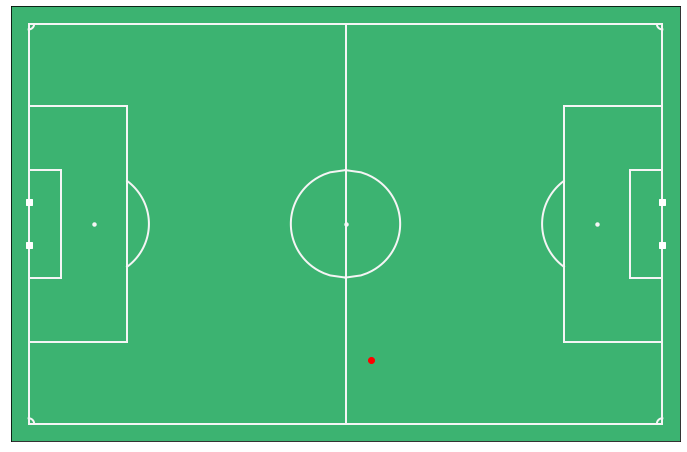

In [15]:
fig, ax = mviz.plot_pitch()
ax.plot(df_events1.loc[198]["Start X"], df_events1.loc[198]["Start Y"], "ro")
#ax.annotate("", xy = df_events1.loc[198][["End X", "End Y"]], xytext = df_events1.loc[198][["Start X", "Start Y"]], alpha = 0)